Please note that this is the 2nd part of the process to use [GAN to generate a single Actor's Face](https://www.kaggle.com/code/nickj26/gan-to-generate-a-single-actor-face?scriptVersionId=127803819)

In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:0000:0100:01


# Importing libraries

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
from tqdm import tqdm as tqdm

A small dataset of this actor's images were created using an [Image-Crawler](https://www.kaggle.com/code/nickj26/image-crawler-to-create-any-celebrity-dataset/notebook), in the previous step

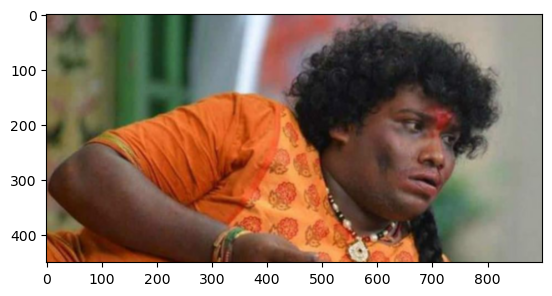

(900, 450)


In [3]:
img = Image.open('/kaggle/input/facerecog-yogibabu/Face_Recognition/train/yogi_babu/000019.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.size)

# Function to extract a single face from a given photograph

In [4]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1+width, y1+height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

1/1 [==============================] - 0s 164ms/step


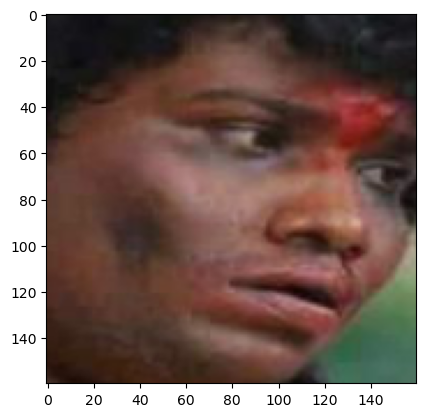

(160, 160, 3)


In [5]:
# load the photo and extract the face. Trial
face = extract_face('/kaggle/input/facerecog-yogibabu/Face_Recognition/train/yogi_babu/000019.jpg')
plt.imshow(face)
plt.show()
print(face.shape)

# Functions to load and save the dataset as a npz file

### Please note the dataset should be of this format but the celebrities can be changed (remember to change the folder names accordingly)

### Also note that in each celebrity folder the images are having only that specific person's face and no one else's. So please make sure that it is so when you create your own custom dataset.

In [6]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in tqdm(os.listdir(dir)):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('/kaggle/input/facerecog-yogibabu/Face_Recognition/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/kaggle/input/facerecog-yogibabu/Face_Recognition/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for future uses
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

  0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 158ms/step


 20%|██        | 1/5 [00:23<01:32, 23.22s/it]

loaded 14 sample for class: ben_afflek
1/1 [==============================] - 0s 168ms/step


 40%|████      | 2/5 [08:27<14:42, 294.29s/it]

loaded 231 sample for class: yogi_babu
1/1 [==============================] - 0s 200ms/step


 60%|██████    | 3/5 [09:01<05:51, 175.52s/it]

loaded 21 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 158ms/step


 80%|████████  | 4/5 [09:31<01:58, 118.26s/it]

loaded 19 sample for class: madonna
1/1 [==============================] - 0s 162ms/step


100%|██████████| 5/5 [09:59<00:00, 119.87s/it]


loaded 17 sample for class: elton_john
(302, 160, 160, 3) (302,)


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 1/5 [00:08<00:33,  8.50s/it]

loaded 5 sample for class: ben_afflek
1/1 [==============================] - 0s 156ms/step


 40%|████      | 2/5 [00:17<00:26,  8.93s/it]

loaded 5 sample for class: yogi_babu
1/1 [==============================] - 0s 154ms/step


 60%|██████    | 3/5 [00:25<00:17,  8.51s/it]

loaded 5 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 166ms/step


 80%|████████  | 4/5 [00:34<00:08,  8.71s/it]

loaded 5 sample for class: madonna
1/1 [==============================] - 0s 156ms/step


100%|██████████| 5/5 [00:42<00:00,  8.56s/it]

loaded 5 sample for class: elton_john
(25, 160, 160, 3) (25,)


In [7]:
# load the face dataset
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (302, 160, 160, 3) (302,) (25, 160, 160, 3) (25,)


# Load the facenet model

In [8]:
facenet_model = load_model('/kaggle/input/facenet-keras/facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [9]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 79ms/step
(302, 128)
1/1 [==============================] - 0s 75ms/step
(25, 128)


# Training

### Using previously created facenet embeddings to train a custom model

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))

# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)

Dataset: train=302, test=25


SVC(kernel='linear', probability=True)

In [11]:
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)

# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


In [15]:
# Save the model to disk
import pickle
filename = 'YogiBabu_FaceRec_model.pickle'
pickle.dump(model, open(filename, 'wb'))

# Testing
on a random image from the test dataset

Predicted: 
['ben_afflek' 'elton_john' 'jerry_seinfeld' 'madonna' 'yogi_babu'] 
[ 0.66539593  0.80672108  0.28695274  2.37969462 95.86123564]
Expected: yogi_babu


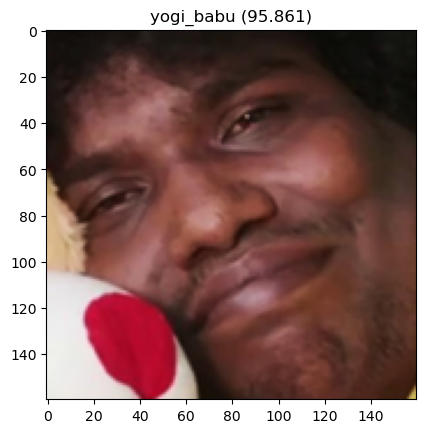

In [16]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()